In [135]:
# Load pickled data
import pickle, os

# TODO: Fill this in based on where you saved the training and testing data

training_file =   os.path.join(os.getcwd(), './train.p')
validation_file = os.path.join(os.getcwd(), './valid.p')
testing_file =    os.path.join(os.getcwd(), './test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [136]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

import numpy as np
from sklearn.utils import shuffle
# Number of training examples
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples = {0}".format(n_valid))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32)
Number of classes = 43


In [137]:
# Signnames CSV loaded to make sure sign names stay attached with data during data amplification
import pandas as pd
sign_names = pd.read_csv('signnames.csv', index_col=0)
sign_names['SignName'][0]

'Speed limit (20km/h)'

# Data Exploration
* Data plotted to show relative number of test examples for each sign in each of training, validation, and test set.
* Datasets are not represented equally.
* Images and names of signs shown from testing and validation set

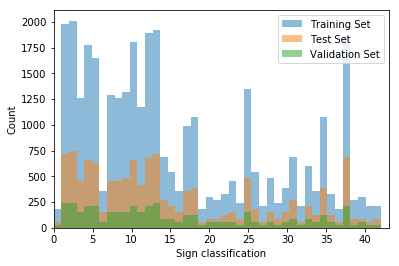

In [138]:
plt.hist(y_train, n_classes, alpha=0.5, label='Training Set')
plt.hist(y_test, n_classes, alpha=0.5, label='Test Set')
plt.hist(y_valid, n_classes, alpha=0.5, label='Validation Set')
plt.xlabel('Sign classification')
plt.ylabel('Count')
plt.xlim(xmin=0, xmax=n_classes)
plt.legend(loc='upper right')
plt.show()

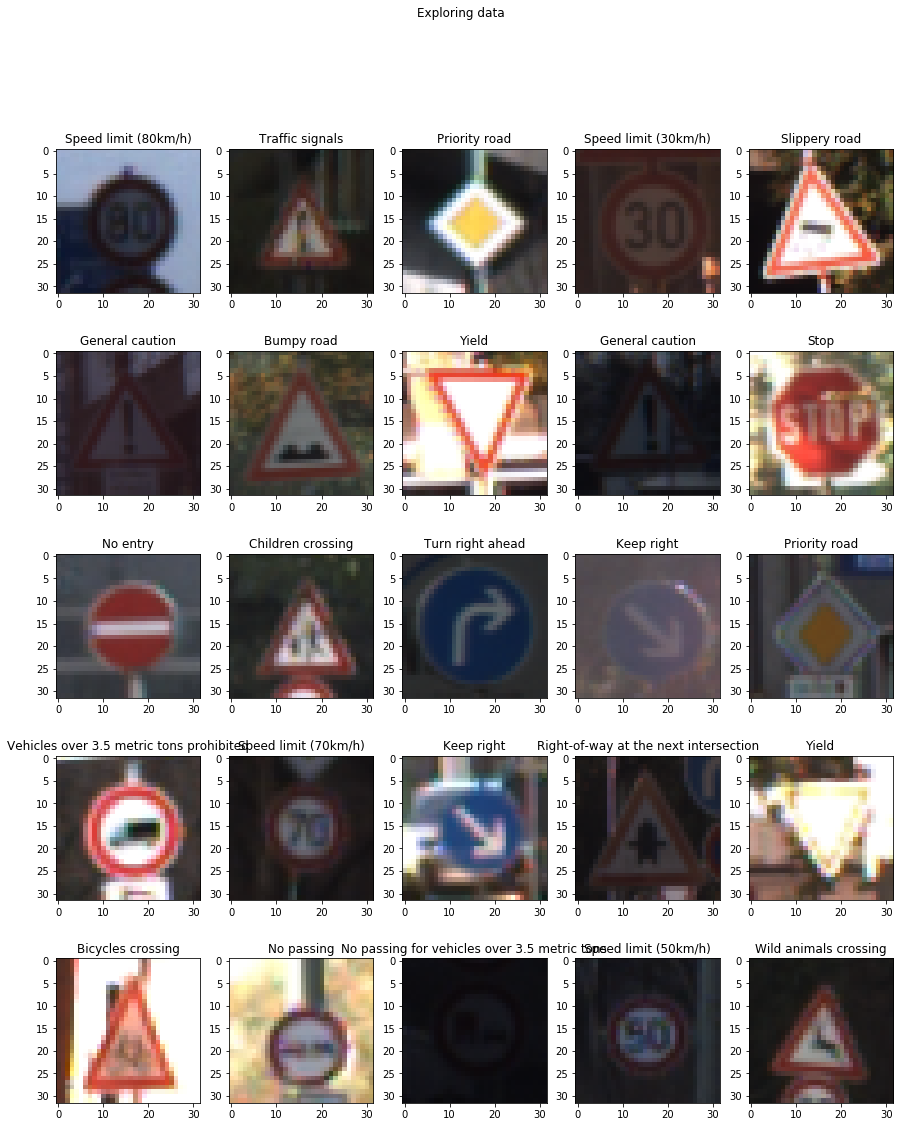

In [148]:
X_train, y_train = shuffle(X_train, y_train)
fig = plt.figure(figsize=(15,18))
fig.suptitle('Exploring data')
for i in range(1,26):
    ax = plt.subplot(5,5,i)
    ax.set_title(sign_names['SignName'][y_train[i]])
    plt.imshow(X_train[i])
plt.show()

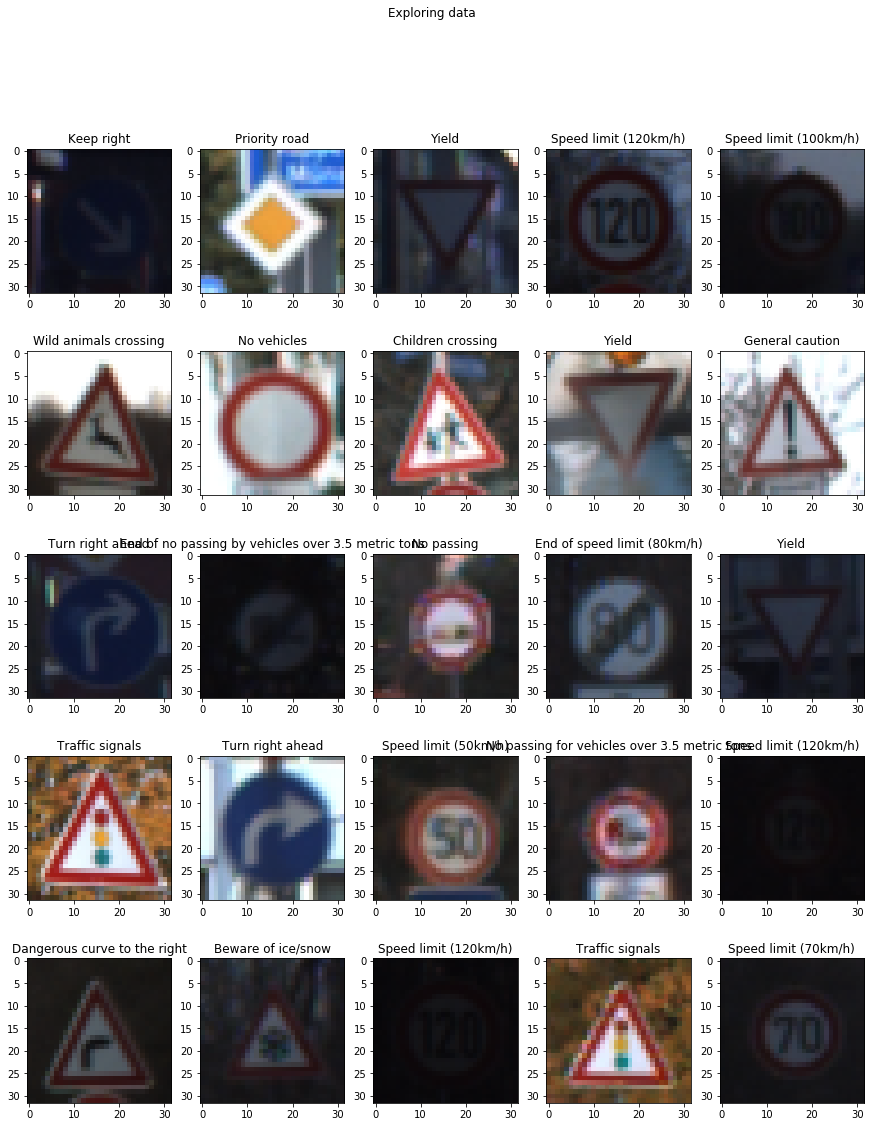

In [147]:
X_valid, y_valid = shuffle(X_valid, y_valid)
fig = plt.figure(figsize=(15,18))
fig.suptitle('Exploring data')
for i in range(1,26):
    ax = plt.subplot(5,5,i)
    ax.set_title(sign_names['SignName'][y_valid[i]])
    plt.imshow(X_valid[i])
plt.show()

# Data Amplification
1. Rotation
2. Histogram equalization (enhance contrast)
3. Contrast limited adaptive histogram equalization image contrast
4. Conorm (enhance edge with difference of gaussian)

## Rotation +/- 5 degrees
* Traffic signs may not be oriented the same as in the training images.
* Images show greater rotation for visual clarity, smaller angles expected in real world
* Border mode changed from constant (black) to replicate. I expect the large shift in color from constant border could impact gradients at the edges and confuse the model.

In [149]:
def rotate_images(X, deg):
    rows, cols = X.shape[1], X.shape[2]
    M_pos = cv2.getRotationMatrix2D((rows//2, cols//2), deg, 1)
    M_neg = cv2.getRotationMatrix2D((rows//2, cols//2), -1*deg, 1)
    X_rot_pos = np.copy(X)
    X_rot_neg = np.copy(X)
    for i in range(X.shape[0]):
        X_rot_pos[i] = cv2.warpAffine(X[i], M_pos, (rows, cols), borderMode=cv2.BORDER_REPLICATE)
        X_rot_neg[i] = cv2.warpAffine(X[i], M_neg, (rows, cols), borderMode=cv2.BORDER_REPLICATE)
    print('Dataset rotated +/-{0} degrees.'.format(deg))
    return X_rot_pos, X_rot_neg

In [150]:
def rotate_images_black(X, deg):
    rows, cols = X.shape[1], X.shape[2]
    M_pos = cv2.getRotationMatrix2D((rows//2, cols//2), deg, 1)
    M_neg = cv2.getRotationMatrix2D((rows//2, cols//2), -1*deg, 1)
    X_rot_pos = np.copy(X)
    X_rot_neg = np.copy(X)
    for i in range(X.shape[0]):
        X_rot_pos[i] = cv2.warpAffine(X[i], M_pos, (rows, cols))
        X_rot_neg[i] = cv2.warpAffine(X[i], M_neg, (rows, cols))
    print('Dataset rotated +/-{0} degrees.'.format(deg))
    return X_rot_pos, X_rot_neg

### Replicated border

Dataset rotated +/-15 degrees.


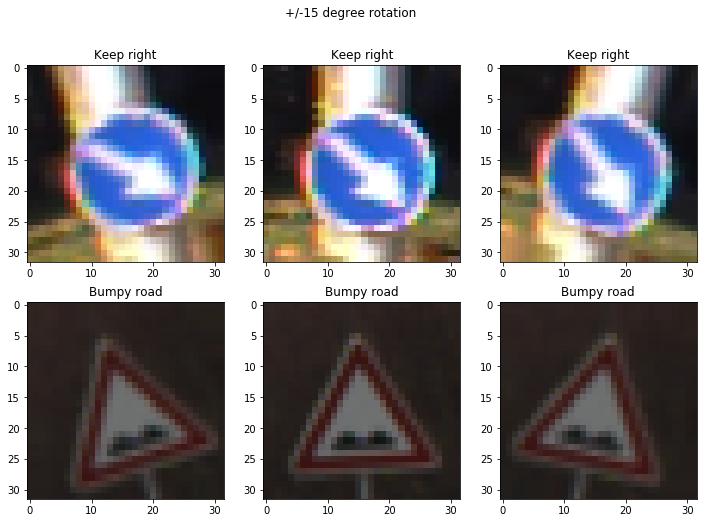

In [151]:
degrees = 15
X_pos, X_neg = rotate_images(X_train, degrees)
X_train, y_train, X_pos, X_neg = shuffle(X_train, y_train, X_pos, X_neg)
fig = plt.figure(figsize=(12,8))
fig.suptitle('+/-{0} degree rotation'.format(degrees))

ax1 = plt.subplot(231)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_pos[0])

ax2 = plt.subplot(232)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax3 = plt.subplot(233)
ax3.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_neg[0])

ax4 = plt.subplot(234)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_pos[1])

ax5 = plt.subplot(235)
ax5.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax6 = plt.subplot(236)
ax6.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_neg[1])
plt.show()

### Constant border

Dataset rotated +/-15 degrees.


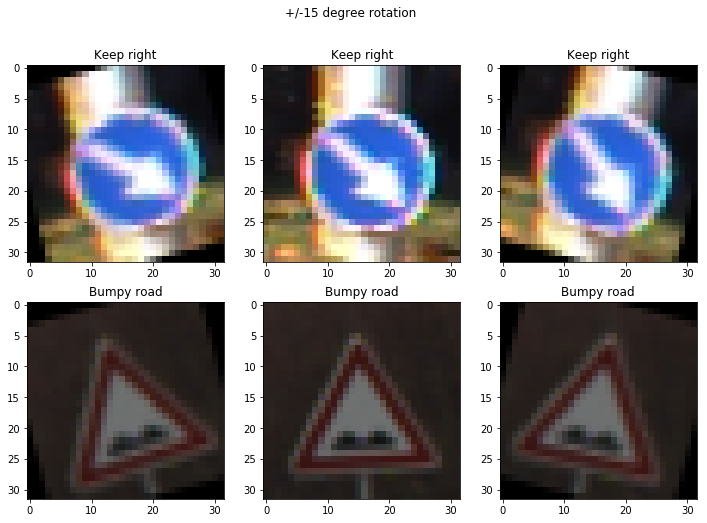

In [152]:
degrees = 15
X_pos, X_neg = rotate_images_black(X_train, degrees)
fig = plt.figure(figsize=(12,8))
fig.suptitle('+/-{0} degree rotation'.format(degrees))

ax1 = plt.subplot(231)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_pos[0])

ax2 = plt.subplot(232)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax3 = plt.subplot(233)
ax3.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_neg[0])

ax4 = plt.subplot(234)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_pos[1])

ax5 = plt.subplot(235)
ax5.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax6 = plt.subplot(236)
ax6.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_neg[1])
plt.show()

## Increase image contrast
* Histogram equalization is used to increase contrast in image
* Color historgram equalization achieved by equalizing Y channel of YCrCb colorspace

In [153]:
def amplify_contrast(X):
    X_eq = np.copy(X)
    for i in range(X.shape[0]):
        YCrCb = cv2.cvtColor(X[i], cv2.COLOR_RGB2YCrCb)
        Y, Cr, Cb = cv2.split(YCrCb)
        Y_eq = cv2.equalizeHist(Y)
        YCrCb_eq = cv2.merge((Y_eq, Cr, Cb))
        X_eq[i] = cv2.cvtColor(YCrCb_eq, cv2.COLOR_YCrCb2RGB)
    print('Dataset histogram equalized')
    return X_eq

Dataset histogram equalized


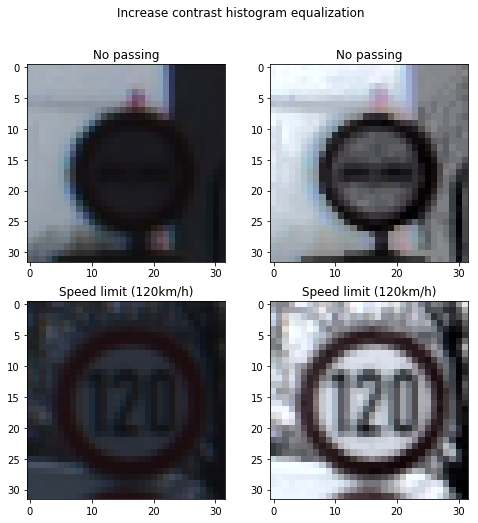

In [156]:
X_histeq = amplify_contrast(X_train)
X_train, y_train, X_histeq = shuffle(X_train, y_train, X_histeq)
fig = plt.figure(figsize=(8,8))
fig.suptitle('Increase contrast histogram equalization')
ax1 = plt.subplot(221)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax2 = plt.subplot(222)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_histeq[0])

ax3 = plt.subplot(223)
ax3.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax4 = plt.subplot(224)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_histeq[1])
plt.show()

## Increase image contrast (Area)
* Adaptive contrast limited histogram equalization is used to increase contrast in image
* Different from histogram equalization in that it looks at blocks of pixels.
* Color historgram equalization achieved by equalizing Y channel of YCrCb colorspace

In [157]:
def clahe_contrast(X):
    X_clahe = np.copy(X)
    clahe = cv2.createCLAHE(tileGridSize=(4,4))
    for i in range(X.shape[0]):
        YCrCb = cv2.cvtColor(X[i], cv2.COLOR_RGB2YCrCb)
        Y, Cr, Cb = cv2.split(YCrCb)
        Y_clahe = clahe.apply(Y)
        YCrCb_clahe = cv2.merge((Y_clahe, Cr, Cb))
        X_clahe[i] = cv2.cvtColor(YCrCb_clahe, cv2.COLOR_YCrCb2RGB)
    print('Dataset histogram equalized clahe')
    return X_clahe

Dataset histogram equalized clahe


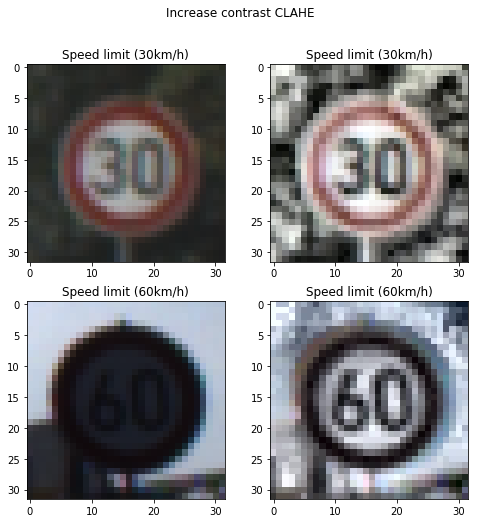

In [165]:
X_clahe = clahe_contrast(X_train)
X_train, y_train, X_clahe = shuffle(X_train, y_train, X_clahe)
fig = plt.figure(figsize=(8,8))
fig.suptitle('Increase contrast CLAHE')

ax1 = plt.subplot(221)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax2 = plt.subplot(222)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_clahe[0])

ax3 = plt.subplot(223)
ax3.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax4 = plt.subplot(224)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_clahe[1])
plt.show()

## Contrast Normalization
* Use a difference of gaussian to amplify edges
* Obtained by convolving a difference of gaussians on the image and adding that to the image
* Based on [Sermanet Lecun 2011](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)
* Can lead to artifacts in color images. I don't understand why that is, so I'm not including this algorithm

In [166]:
def contrast_normalization(X):
    X_conorm = np.copy(X)
    gauss_1 = cv2.getGaussianKernel(5, 1) + np.transpose(cv2.getGaussianKernel(5, 1))
    gauss_2 = cv2.getGaussianKernel(5, 3) + np.transpose(cv2.getGaussianKernel(5, 3))
    diff_gauss = gauss_1 - gauss_2
    for i in range(X.shape[0]):    
        X_conorm[i] = X[i] + cv2.filter2D(X[i], -1, diff_gauss)
    print('Contrast normalized')
    return X_conorm

Contrast normalized


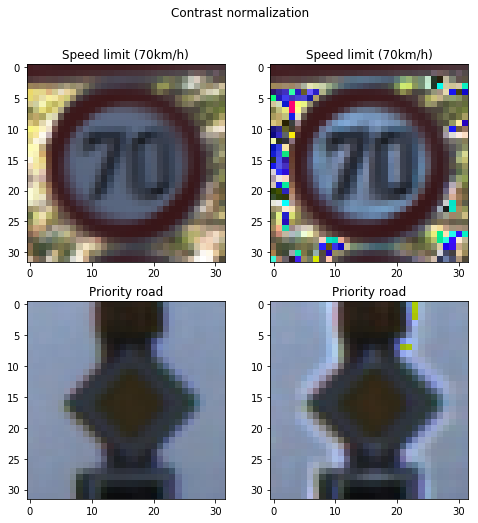

In [183]:
X_conorm = contrast_normalization(X_train)
X_train, y_train, X_conorm = shuffle(X_train, y_train, X_conorm)
fig = plt.figure(figsize=(8,8))
fig.suptitle('Contrast normalization')

ax1 = plt.subplot(221)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax2 = plt.subplot(222)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_conorm[0])

ax3 = plt.subplot(223)
ax3.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax4 = plt.subplot(224)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_conorm[1])
plt.show()

In [184]:
# Note contrast normalization removed. It doesn't look like it's working well.
def amplify_dataset(X, y):
    X_rot_pos, X_rot_neg = rotate_images(X, 5)
    X = np.concatenate((X, X_rot_neg, X_rot_pos), axis=0)
    y = np.concatenate((y, y, y), axis=0)
    
    X_histeq = amplify_contrast(X)
    X_clahe = clahe_contrast(X)
    X_conorm = contrast_normalization(X)
    X = np.concatenate((X, X_histeq, X_clahe), axis=0)
    y = np.concatenate((y, y, y), axis=0)
    print('Number of examples increased to {0}'.format(X.shape[0]))
    return X, y

In [185]:
X_train, y_train = amplify_dataset(X_train, y_train)

Dataset rotated +/-5 degrees.
Dataset histogram equalized
Dataset histogram equalized clahe
Contrast normalized
Number of examples increased to 313191


# Preprocess Data
* Performed on training, validation and test data.
* Grayscale images to reduce the number of parameters. 
* [Sermanet Lecun 2011](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) found color didn't improve accuracy a lot. Prior models run with color agreed with this.
* Data is normalized by subtracting the mean image and normalizing following [common best practices](http://cs231n.github.io/neural-networks-2/#datapre) in order to keep our features in a consistent range. This will reduce the likelihood of our gradients getting out of control through vanishing gradient / saturating neurons in the network

In [186]:
def grayscale(X):
    X_gray = np.copy(X[:,:,:,0])
    for i in range(X.shape[0]):
        X_gray[i] = cv2.cvtColor(X[i], cv2.COLOR_RGB2GRAY)
    return X_gray

In [187]:
#Normalize the data
def normalize(X):
    X = X.astype('float64') - np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    return X

In [188]:
def preprocess(X):
    X_gray = grayscale(X)
    X_norm = normalize(X_gray)
    return X_norm

In [189]:
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

## Model Architecture
1. Follows similar structure to [Ciresan et al 2012](http://people.idsia.ch/~juergen/nn2012traffic.pdf)
2. Consists of 3 sets of two convolutional layers with ReLU activation functions and a pooling layer
3. Same padding used to limit reduction in image size since starting image size was smaller than paper
4. A fully connected layer is followed by a dropout layer.
5. Dropout is used for regularization to reduce overfitting of the model.
6. Two more hidden layers are used before the final output layer
7. The exact shape of every layer is in the picture below
![My Image](examples/Architecture.png)

In [13]:
import tensorflow as tf
print(tf.__version__)

1.0.0


In [17]:
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, mean=0.01, stddev=0.1))
def bias_variable(shape):
    return tf.Variable(tf.zeros(shape=shape))

In [18]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='VALID')
def conv2d_same(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
def max_pool(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1], 
                          padding='VALID')

## Train, Validate and Test the Model
A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

1. Learning rate set to 1e-4. The learning rate of Adam decays over time and adjusts based on the gradient of the variables with momentum.
2. Adam Optimizer adjusts the learning rate using the [Adam algorithm](https://arxiv.org/pdf/1412.6980v8.pdf) This optimizer is derived from Adagrad an adaptive learning algorithm. The algorithm monotonically reduces its learning rate over time. RMSProp improved on this by using a moving average of gradients to reduce the aggressiveness of Adagrad. Adam improved on RMSProp by adding momentum. The default momentum and decay rate are used from tensorflow.
3. A batch size of 64 is a function of using a large VGG-like architecture and having an older GPU. The first LeNet-like architecture had a batch size of 512.
4. Dropout parameter of 0.5 is used as a default because it works [Srivastava et al 2014](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) supposedly because it maximizes the regularization value of the dropout layer.
5. Based on VGGNet
6. The number of epochs was set to 1000 originally. This is because it was a large number at which point it seemed like the loss had reached a plateau. When training multiple networks 500 was used because it took a long time and graphs of validation accuracy of the prior run had plateued around then.

In [19]:
def SketchNet(input_layer, dropout, num_classes=43):
    ''' Neural Network modeled on VGG Net and scaled down for my machine.
    Params: input_layer:  4D tensor holding 32x32 grayscale images
            dropout:      Fraction of neurons to kill during training using dropout alrogithm
            num_classes:  Number of discrete classes this network will predict
    '''
#     depth = [1, 6, 16, 400, 160, 96, num_classes]
    input_layer = tf.reshape(x, [-1,32,32, 1])
    print('Layer 0 Init: Shape {}'.format(input_layer.get_shape()))
    
    F_w_1 = weight_variable([5,5,1,32])
    F_b_1 = bias_variable([32])
    conv_1 = tf.nn.relu(conv2d_same(input_layer, F_w_1) + F_b_1)
    print('Layer 1 Convolution: Shape {}'.format(conv_1.get_shape()))
    F_w_2 = weight_variable([3,3,32,32])
    F_b_2 = bias_variable([32])
    conv_2 = tf.nn.relu(conv2d_same(conv_1, F_w_2) + F_b_2)
    print('Layer 2 Convolution: Shape {}'.format(conv_2.get_shape()))
    pool_1 = max_pool(conv_2)
    print('Layer 3 Pooling: Shape {}'.format(pool_1.get_shape()))
    
    F_w_3 = weight_variable([3,3,32,64])
    F_b_3 = bias_variable([64])
    conv_3 = tf.nn.relu(conv2d_same(pool_1, F_w_3) + F_b_3)
    print('Layer 4 Convolution: Shape {}'.format(conv_3.get_shape()))
    F_w_4 = weight_variable([3,3,64,64])
    F_b_4 = bias_variable([64])
    conv_4 = tf.nn.relu(conv2d_same(conv_3, F_w_4) + F_b_4)
    print('Layer 5 Convolution: Shape {}'.format(conv_4.get_shape()))
    pool_2 = max_pool(conv_4)
    print('Layer 6 Pooling: Shape {}'.format(pool_2.get_shape()))
    
    F_w_5 = weight_variable([3,3,64,128])
    F_b_5 = bias_variable([128])
    conv_5 = tf.nn.relu(conv2d_same(pool_2, F_w_5) + F_b_5)
    print('Layer 7 Convolution: Shape {}'.format(conv_5.get_shape()))
    F_w_6 = weight_variable([3,3,128,128])
    F_b_6 = bias_variable([128])
    conv_6 = tf.nn.relu(conv2d_same(conv_5, F_w_6) + F_b_6)
    print('Layer 8 Convolution: Shape {}'.format(conv_6.get_shape()))
    pool_3 = max_pool(conv_6)
    print('Layer 9 Pooling: Shape {}'.format(pool_3.get_shape()))
    
    dense_1 = tf.contrib.layers.flatten(pool_3)
    print('Layer 10 Flatten: Shape {}'.format(dense_1.get_shape()))
    
    drop_1 = tf.nn.dropout(dense_1, dropout)
    
    F_w_7 = weight_variable([2048, 400])
    F_b_7 = bias_variable([400])
    dense_2 = tf.nn.relu(tf.matmul(drop_1, F_w_7) + F_b_7)
    print('Layer 11 Matrix Multiplication: Shape {}'.format(dense_2.get_shape()))
    
    F_w_8 = weight_variable([400, 100])
    F_b_8 = bias_variable([100])
    dense_3 = tf.nn.relu(tf.matmul(dense_2, F_w_8) + F_b_8)
    print('Layer 12 Matrix Multiplication: Shape {}'.format(dense_3.get_shape()))
    
    F_w_9 = weight_variable([100, n_classes])
    F_b_9 = bias_variable([n_classes])
    logits = tf.nn.relu(tf.matmul(dense_3, F_w_9) + F_b_9)
    print('Final Layer Matrix Multiplication: Shape {}'.format(logits.get_shape()))
    
    return logits

In [20]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
# x = tf.constant(X_train_rot_gray)
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.0001
pred = SketchNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= pred, 
                                                        labels= one_hot_y)

loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Layer 0 Init: Shape (?, 32, 32, 1)
Layer 1 Convolution: Shape (?, 32, 32, 32)
Layer 2 Convolution: Shape (?, 32, 32, 32)
Layer 3 Pooling: Shape (?, 16, 16, 32)
Layer 4 Convolution: Shape (?, 16, 16, 64)
Layer 5 Convolution: Shape (?, 16, 16, 64)
Layer 6 Pooling: Shape (?, 8, 8, 64)
Layer 7 Convolution: Shape (?, 8, 8, 128)
Layer 8 Convolution: Shape (?, 8, 8, 128)
Layer 9 Pooling: Shape (?, 4, 4, 128)
Layer 10 Flatten: Shape (?, 2048)
Layer 11 Matrix Multiplication: Shape (?, 400)
Layer 12 Matrix Multiplication: Shape (?, 100)
Final Layer Matrix Multiplication: Shape (?, 43)


In [89]:
def evaluate(X_data, y_data, sess):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        batch_y = y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_op, feed_dict={x: batch_x,
                                                    y: batch_y,
                                                    keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training multiple networks
The below training sought to train multiple networks for testing an ensemble network. The same code works to train a single network.

In [30]:
for i in range(7,10):
    tf.reset_default_graph()
    x = tf.placeholder(tf.float32, (None, 32, 32))
    y = tf.placeholder(tf.int32, (None))
    keep_prob = tf.placeholder(tf.float32)
    # x = tf.constant(X_train_rot_gray)
    one_hot_y = tf.one_hot(y, n_classes)

    rate = 0.0001
    pred = SketchNet(x, keep_prob)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= pred, 
                                                            labels= one_hot_y)

    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=rate)
    training_operation = optimizer.minimize(loss_operation)
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(one_hot_y, 1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    import time
    epoch_accuracy = []
    EPOCHS = 500
    BATCH_SIZE = 64
    save_file = './test_model{0}.ckpt'.format(i)
    saver = tf.train.Saver()
    # print('Saver successfully created')
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        cur_time = time.time()
        for epoch in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, n_train, BATCH_SIZE):
                images_feed= X_train[offset:offset+BATCH_SIZE]
                labels_feed = y_train[offset:offset+BATCH_SIZE]
                _, loss_value = sess.run([training_operation, loss_operation], 
                                         feed_dict={x: images_feed, y: labels_feed, keep_prob: 0.5})
            if (epoch+1) % 10 == 0:
                validation_accuracy = evaluate(X_valid, y_valid)
                epoch_accuracy.append((validation_accuracy, loss_value))
                prev_time = cur_time
                cur_time = time.time()
                print('EPOCH {}'.format(epoch+1))
                print('Loss Value {}'.format(loss_value))
                print('Validation Accuracy = {:.3f}'.format(validation_accuracy))
                print('Time/epoch {0} s\n'.format((cur_time - prev_time)/10))
        saver.save(sess, save_file)
        print('Saved {0} successfully'.format(save_file))
    epoch_accuracy_loss = []
    epoch_accuracy_acc = []
    for epoch in epoch_accuracy:
        epoch_accuracy_acc.append(epoch[0])
        epoch_accuracy_loss.append(epoch[1])
    epochs = np.arange(10,EPOCHS+1,10)
    accuracy = pd.DataFrame({'Epoch': epochs, 
                             'Loss': epoch_accuracy_loss,
                             'Accuracy': epoch_accuracy_acc})
    accuracy
    accuracy.to_csv('accuracy_testmodel{0}.csv'.format(i), index=False)

Layer 0 Init: Shape (?, 32, 32, 1)
Layer 1 Convolution: Shape (?, 32, 32, 32)
Layer 2 Convolution: Shape (?, 32, 32, 32)
Layer 3 Pooling: Shape (?, 16, 16, 32)
Layer 4 Convolution: Shape (?, 16, 16, 64)
Layer 5 Convolution: Shape (?, 16, 16, 64)
Layer 6 Pooling: Shape (?, 8, 8, 64)
Layer 7 Convolution: Shape (?, 8, 8, 128)
Layer 8 Convolution: Shape (?, 8, 8, 128)
Layer 9 Pooling: Shape (?, 4, 4, 128)
Layer 10 Flatten: Shape (?, 2048)
Layer 11 Matrix Multiplication: Shape (?, 400)
Layer 12 Matrix Multiplication: Shape (?, 100)
Final Layer Matrix Multiplication: Shape (?, 43)
EPOCH 10
Loss Value 3.490654468536377
Validation Accuracy = 0.084
Time/epoch 53.51769535541534 s

EPOCH 20
Loss Value 3.058199882507324
Validation Accuracy = 0.156
Time/epoch 53.209389090538025 s

EPOCH 30
Loss Value 1.5504026412963867
Validation Accuracy = 0.581
Time/epoch 53.21339662075043 s

EPOCH 40
Loss Value 0.39222604036331177
Validation Accuracy = 0.816
Time/epoch 53.20665421485901 s

EPOCH 50
Loss Value 0.

In [28]:
epoch_accuracy_loss = []
epoch_accuracy_acc = []
for epoch in epoch_accuracy:
    epoch_accuracy_acc.append(epoch[0])
    epoch_accuracy_loss.append(epoch[1])
epochs = np.arange(10,1001,10)
accuracy = pd.DataFrame({'Epoch': epochs, 
                         'Loss': epoch_accuracy_loss,
                         'Accuracy': epoch_accuracy_acc})
accuracy
accuracy.to_csv('accuracy_testmodel6.csv', index=False)

## Validation Accuracy

* All networks but one achieved the accuracy threshold.
* The inaccurate network (8) was trained exactly the same as other networks (7&9)
* A prior model (4) with an architecture CPCPCPFFF was just as accurate as VGGs CCPCCPCCPFFF architecture

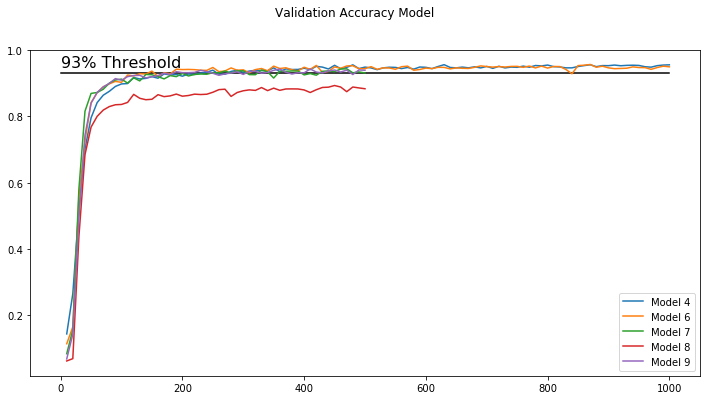

In [133]:
# Models 6-9 trained with VGG-like net
fig = plt.figure(figsize=(12,6))
fig.suptitle('Validation Accuracy Model'.format(i))
ax1.set_xlim(left=0, right=1000)
ax1.set_ylim(top=1.0, bottom=0.0)
ax1 = plt.subplot(111)
plt.text(0,.95, '93% Threshold', fontsize=16)
ax1.plot((0,1000),(.93,.93), 'k-')
for i in range(4,10):
    if i != 5:
        accuracy = pd.read_csv('accuracy_testmodel{0}.csv'.format(i))
        ax1.plot(accuracy['Epoch'], accuracy['Accuracy'], label='Model {0}'.format(i))
legend = ax1.legend()
plt.show()

## Ensemble
Ensemble bagging across 4 networks was carried out. It didn't have any impact. This is probably because usually 10 networks are used in ensemble learning and the networks are only different in their initialization and EPOCH numbers. 
## Restoring models
* Major lesson learned. restore expects a path so use ./ if in root directory...
* Test set accuracy is similar to validation set accuracy so overfitting to the validation set is not an issue.

In [97]:
with tf.Session() as sess:
    BATCH_SIZE = 64
    num_examples = len(X_valid)
    saver = tf.train.Saver()
    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './test_model6.ckpt')
    print('Model 6 Validation Accuracy: {}'.format(evaluate(X_valid, y_valid, sess)))
    print('Model 6 Test Accuracy: {}'.format(evaluate(X_test, y_test, sess)))
    pred_valid_6 = predict_labels(X_valid)
    pred_test_6 = predict_labels(X_test)
    
    sess2 = tf.Session()
    saver.restore(sess2, './test_model7.ckpt')
    print('Model 7 Validation Accuracy: {}'.format(evaluate(X_valid, y_valid, sess2)))
    print('Model 7 Test Accuracy: {}'.format(evaluate(X_test, y_test, sess2)))
    pred_valid_7 = predict_labels(X_valid)
    pred_test_7 = predict_labels(X_test)
    
    sess3 = tf.Session()
    saver.restore(sess3, './test_model9.ckpt')
    print('Model 9 Validation Accuracy: {}'.format(evaluate(X_valid, y_valid, sess3)))
    print('Model 9 Test Accuracy: {}'.format(evaluate(X_test, y_test, sess3)))
    pred_valid_9 = predict_labels(X_valid)
    pred_test_9 = predict_labels(X_test)
    
    sess4 = tf.Session()
    saver.restore(sess4, './test_model8.ckpt')
    print('Model 8 Validation Accuracy: {}'.format(evaluate(X_valid, y_valid, sess4)))
    print('Model 8 Test Accuracy: {}'.format(evaluate(X_test, y_test, sess4)))
    pred_valid_8 = predict_labels(X_valid)
    pred_test_8 = predict_labels(X_test)
    
    ensemble_pred = tf.divide(tf.add_n([pred_valid_6, pred_valid_7, pred_valid_9, pred_valid_8]), tf.constant(4.0))
    ensemble_x_entropy = sess.run(tf.nn.softmax_cross_entropy_with_logits(logits= ensemble_pred, 
                                                                          labels= one_hot_y),
                                  feed_dict={y: y_valid})
    ensemble_loss = sess.run(tf.reduce_mean(ensemble_x_entropy))
    ensemble_correct_pred = sess.run(tf.equal(tf.argmax(ensemble_pred, 1), tf.argmax(one_hot_y, 1)),
                                     feed_dict={y: y_valid})
    ensemble_accuracy= sess.run(tf.reduce_mean(tf.cast(ensemble_correct_pred, tf.float32)))
    print('Ensemble Accuracy: {0}'.format(ensemble_accuracy))
    
    ensemble_test = tf.divide(tf.add_n([pred_test_6, pred_test_7, pred_test_9, pred_test_8]), tf.constant(4.0))
    ensemble_x_entropy = sess.run(tf.nn.softmax_cross_entropy_with_logits(logits= ensemble_test, 
                                                                          labels= one_hot_y),
                                  feed_dict={y: y_test})
    ensemble_loss = sess.run(tf.reduce_mean(ensemble_x_entropy))
    ensemble_correct_pred = sess.run(tf.equal(tf.argmax(ensemble_test, 1), tf.argmax(one_hot_y, 1)),
                                     feed_dict={y: y_test})
    ensemble_accuracy= sess.run(tf.reduce_mean(tf.cast(ensemble_correct_pred, tf.float32)))
    print('Ensemble Accuracy Test: {0}'.format(ensemble_accuracy))
#     loss_operation = tf.reduce_mean(cross_entropy)
#     optimizer = tf.train.AdamOptimizer(learning_rate=rate)
#     training_operation = optimizer.minimize(loss_operation)
#     correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(one_hot_y, 1))
#     accuracy_op = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Model 6 Validation Accuracy: 0.9498866210719085
Model 6 Test Accuracy: 0.9447347585303578
Model 7 Validation Accuracy: 0.93129251679055
Model 7 Test Accuracy: 0.9383214568959657
Model 9 Validation Accuracy: 0.9394557815560408
Model 9 Test Accuracy: 0.9279493270652783
Model 8 Validation Accuracy: 0.8836734694688498
Model 8 Test Accuracy: 0.8868566904573901
Ensemble Accuracy: 0.9498866200447083
Ensemble Accuracy Test: 0.9447347521781921


In [105]:
def predict_labels(X_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    all_predictions = sess.run(pred, feed_dict={x: X_data[0:BATCH_SIZE], keep_prob: 1.0})
    for offset in range(BATCH_SIZE, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        batch_predictions = sess.run(pred, feed_dict={x: batch_x, keep_prob: 1.0})
        all_predictions = tf.concat([all_predictions, batch_predictions], 0, name='all_predictions')
    return all_predictions

## Acquiring New Images
* Images were found by driving around with Google streetview in Hamburg.
* The images from streetview were skewed from looking at signs from angle
* The fourth image is close to the ground and is more skewed than the others.
* The background of the fifth image is a truck cabin.
* These images should be easy for the model to predict
* In order to be tested the images needed to be resized to 32x32 and normalized

In [103]:
from PIL import Image

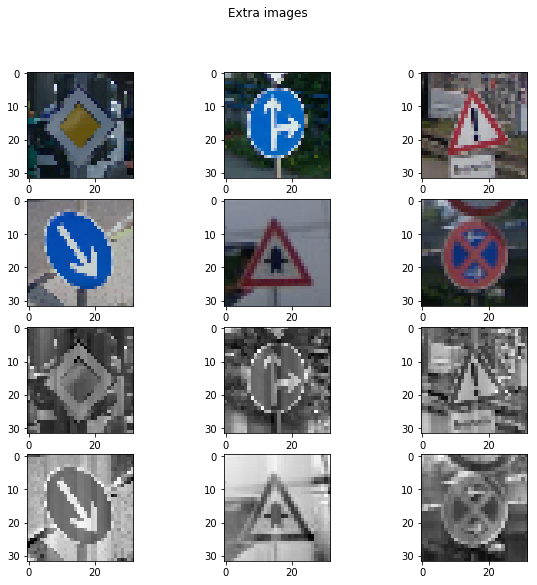

In [123]:
for i in range(9,15):
    img = cv2.imread('./examples/Selection_{0:03d}.png'.format(i))
    resized = cv2.resize(img, (32,32), 0, 0, cv2.INTER_CUBIC)
    cv2.imwrite('./examples/Resized_{0:03d}.png'.format(i), resized)
#     resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
#     plt.subplot(230+i)
#     plt.imshow(resized)
images = np.zeros((6,32,32))
fig = plt.figure(figsize=(10,9))
fig.suptitle('Extra images')
for i in range(6):
    img = mpimg.imread('./examples/Resized_{0:03d}.png'.format(i+9))
    ax = plt.subplot(4,3,i+1)
    plt.imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    norm = normalize(gray)
    axn = plt.subplot(4,3,i+7)
    plt.imshow(norm, cmap='gray')
    images[i] = norm
plt.show()

Test Accuracy is 94.47%
                       Probability
Sign Name                         
Priority road         1.000000e+00
Roundabout mandatory  1.093382e-10
Speed limit (20km/h)  1.289648e-12
Speed limit (30km/h)  1.289648e-12
Speed limit (50km/h)  1.289648e-12 

                      Probability
Sign Name                        
Go straight or right     0.699499
Stop                     0.273761
Priority road            0.014698
Roundabout mandatory     0.002172
No vehicles              0.000299 

                     Probability
Sign Name                       
General caution     9.987790e-01
Traffic signals     1.165736e-03
Stop                3.694654e-05
Keep right          1.032009e-06
Beware of ice/snow  8.811696e-07 

                        Probability
Sign Name                          
Keep right             1.000000e+00
Yield                  1.143891e-26
Traffic signals        1.324083e-29
Wild animals crossing  3.446154e-30
General caution        1.264167e-30 

  

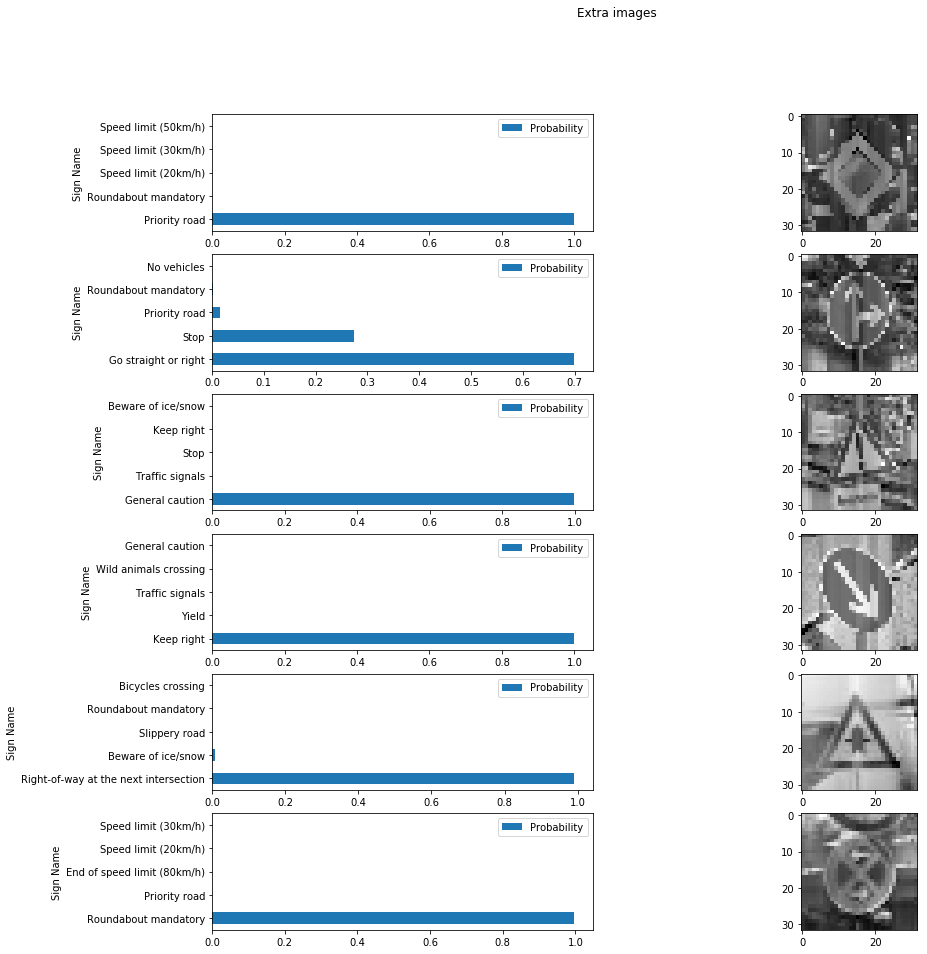

In [132]:
a = []
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './test_model6.ckpt')
    test_accuracy = evaluate(X_test, y_test, sess)
    print('Test Accuracy is {:.2f}%'.format(test_accuracy*100))
    guess = sess.run(pred, feed_dict={x: images, keep_prob: 1.0})
    smax = tf.nn.softmax(guess)
    top_5 = sess.run(tf.nn.top_k(smax, k=5, sorted=True))
    fig = plt.figure(figsize=(15,15))
    fig.suptitle('Extra images')
    for i in range(6):
        df5 = pd.DataFrame({'Probability': top_5.values[i], 
                            'Sign Name': sign_names['SignName'][top_5.indices[i]]})
        df5 = df5.set_index('Sign Name')
        print(df5, '\n')
        ax1 = plt.subplot(6,2,i*2+2)
        ax2 = plt.subplot(6,2,i*2+1)
        ax1.imshow(images[i], cmap='gray')
        df5.plot.barh(ax=ax2)
    plt.show()   
#     print(pd.DataFrame({'a': top_5.indices, 'b': top_5.values}))
#     df5 = pd.DataFrame({'SignIndex': top_5.indices,
#                         'Probabilities': top_5.values}) 
#     for i in range(images.shape[0]):
#         print(guess[i])
#         print(sign_names['SignName'][guess[i].argsort()[0:5]])

Successfully classified 6/6 images